# Clusters

# K-means

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

In [2]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
variable_names = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = variable_names

### Modelo

In [3]:
cluster = KMeans(n_clusters=3, random_state=5).fit(X)
cluster

KMeans(n_clusters=3, random_state=5)

Text(0.5, 1.0, 'Resultado')

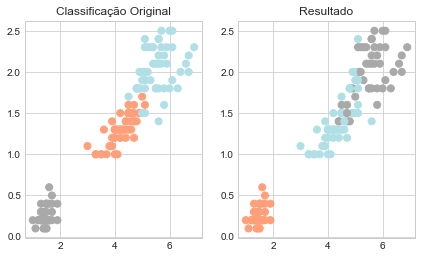

In [6]:
cores = np.array(["darkgray", "lightsalmon", "powderblue"])

plt.subplot(1, 2, 1) # plot 2 gráficos um ao lado do outro
plt.scatter(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"], c=cores[iris.target], s=50)
plt.title("Classificação Original")

plt.subplot(1, 2, 2) # plot 2 gráficos um ao lado do outro
plt.scatter(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"], c=cores[cluster.labels_], s=50)
plt.title("Resultado")

Text(0.5, 1.0, 'Resultado')

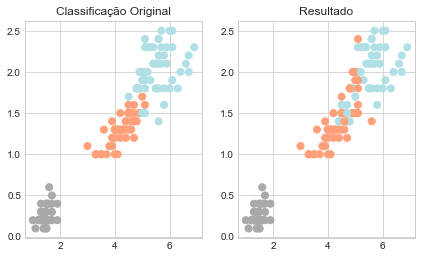

In [7]:
relabel= np.choose(cluster.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1, 2, 1) # plot 2 gráficos um ao lado do outro
plt.scatter(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"], c=cores[iris.target], s=50)
plt.title("Classificação Original")

plt.subplot(1, 2, 2) # plot 2 gráficos um ao lado do outro
plt.scatter(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"], c=cores[relabel], s=50)
plt.title("Resultado")

### Avaliando

In [8]:
metrica = classification_report(y, relabel)
print(metrica)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



# Método Hierarquico

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

np.set_printoptions(precision=4, suppress=True)

caminho = 'C:/Users/Rio Photo Eventos/Documents/programacao/Vizualização de Dados com Python/dados/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['nomes','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'qtd_marchas', 'carb']

X = carros[['mpg', 'disp', 'hp', 'wt']].values

y = carros['am'].values

In [11]:
z = linkage(X, "ward")

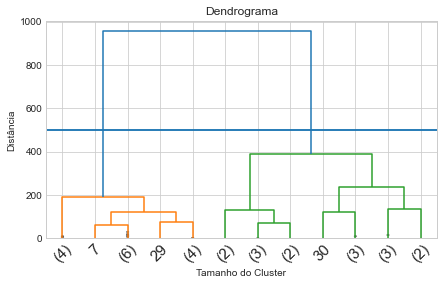

In [13]:
dendrogram(z, truncate_mode="lastp", p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title("Dendrograma")
plt.xlabel("Tamanho do Cluster")
plt.ylabel("Distância")

plt.axhline(y=500)
plt.axhline(y=500)
plt.show()

### Gerando cluster hierarquico

In [15]:
k = 2
hclusters = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="ward").fit(X)
accuracy_score(y, hclusters.labels_)

0.78125

In [17]:
hclusters = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="average").fit(X)
accuracy_score(y, hclusters.labels_)

0.78125

In [18]:
hclusters = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="complete").fit(X)
accuracy_score(y, hclusters.labels_)

0.4375

O de maior acuracia é o melhor

# CLASSIFICAÇÃO KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=4, suppress=True)


In [22]:
X = preprocessing.scale(X)

In [26]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=.33, random_state=17)

In [27]:
clf = KNeighborsClassifier()
clf.fit(X_treino, y_treino)

print(clf)

KNeighborsClassifier()


In [28]:
y_esperado = y_teste
y_predito = clf.predict(X_teste)

print(classification_report(y_esperado, y_predito))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



Descobrir se o carro é manual ou automatico